###  Title:-🧠Detecting Spam with Machine Learning and NLP

## 🧾 Project Summary
This project focuses on building an intelligent email spam classifier using Natural Language Processing (NLP) and machine learning. With a dataset of 5,000 labeled emails, the system learns to distinguish between legitimate (ham) and unsolicited (spam) messages. The pipeline includes text preprocessing, TF-IDF vectorization, model training (e.g., Naive Bayes), and evaluation using accuracy, precision, recall, and F1-score. The final model is deployed in an interactive Streamlit app that predicts spam in real time and displays confidence scores.

## 🎯 Project Objective
- Automate the detection of spam emails using NLP techniques
- Reduce manual filtering effort and improve email security
- Demonstrate end-to-end ML pipeline: from raw text to deployment
- Provide a user-friendly interface for real-time prediction
- Highlight the business value of NLP in communication-heavy domains like HR and customer service

Would you like help writing the next section — like “Data Overview” or “Pipeline Architecture”? I can help you build a full notebook structure that recruiters will love.

## 📌 Business Problem
HR, customer support, and operations teams receive thousands of emails daily. Many of these are spam — promotional offers, phishing attempts, or irrelevant messages — which clutter inboxes, waste time, and pose security risks. Manual filtering is inefficient and error-prone, especially at scale

## 🎯 Goal
Build an automated, intelligent system using NLP and machine learning to classify emails as spam or ham (legitimate), improving productivity, security, and decision-making across business units.


## 🛠️ How This Solves the Problem
 model:
- ✅ Processes raw email text using NLP (tokenization, stopword removal, lemmatization)
- ✅ Converts text into numerical features using TF-IDF
- ✅ Trains a classifier (e.g., Naive Bayes) to detect spam patterns
- ✅ Predicts spam vs ham with high accuracy and confidence scores
- ✅ Can be deployed in dashboards or integrated into email systems


## 📦 Load Librarie

In [77]:
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
# Warnings
import warnings
warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 📊 Data Overview
- 1 → Spam
- 0 → Ham


In [78]:
df = pd.read_csv("spam-1(in).csv", encoding='ISO-8859-1')

In [79]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [80]:
df.drop(columns=["Unnamed: 2",	"Unnamed: 3"	,"Unnamed: 4"],inplace=True)

In [81]:
df['v1'] = df['v1'].replace({'ham': 0, 'spam': 1})

In [82]:
df.columns=['label','message']

In [83]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
import string

symbols = set(string.punctuation)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [85]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [86]:
import re

 ## Text Preprocessing -NLP Pipeline


In [87]:
def preprocessor_text(text):
    ## tokinization 
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", '', text)
    tokens=word_tokenize(text)
    ## removing stopwords
    stop_words=set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words ]
    ## remove punctuations
    tokens = [word for word in tokens if word.lower() not in symbols]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word.lower(),"v") for word in  tokens]
    return ' '.join(tokens)

In [88]:
df["clean"]=df["message"].apply(preprocessor_text)

In [89]:
df.head()

,label,message,clean
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",nah n't think go usf live around though


### Sentiment Scoring with VADER

In [90]:
from nltk.sentiment import SentimentIntensityAnalyzer


sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['clean'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [91]:
df.head()

,label,message,clean,sentiment_score
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy .. available bugis n gre...,0.4019
1,0,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...,0.5267
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,0.7964
3,0,U dun say so early hor... U c already then say...,u dun say early hor ... u c already say ...,0.0000
4,0,"Nah I don't think he goes to usf, he lives aro...",nah n't think go usf live around though,-0.1027


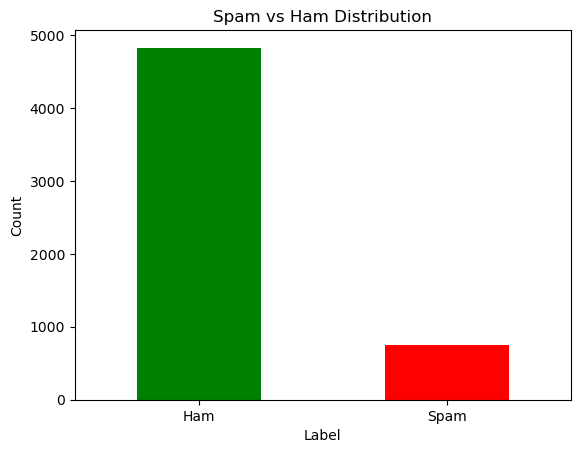

In [119]:
df['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Spam vs Ham Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Ham", "Spam"], rotation=0)
plt.show()


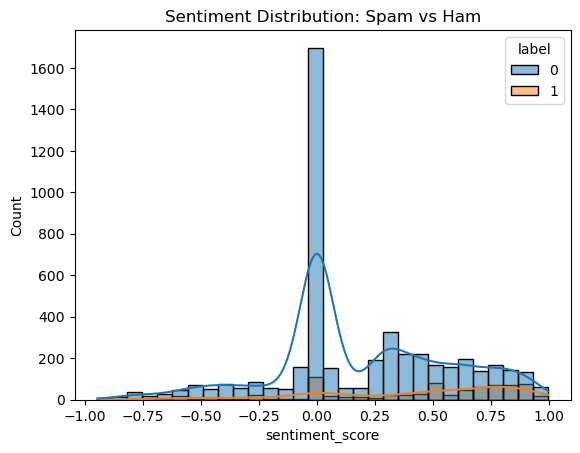

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='sentiment_score', hue='label', bins=30, kde=True)
plt.title("Sentiment Distribution: Spam vs Ham")
plt.show()

In [94]:
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [95]:
df.isnull().sum()

label              0
message            0
clean              0
sentiment_score    0
dtype: int64

In [96]:
X=df['clean']
y=df['label']

In [97]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((4457,), (1115,), (4457,), (1115,))

## Feature Extraction

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
vectorizer= TfidfVectorizer(max_features=3000)
X_train=vectorizer.fit_transform(X_train)



In [100]:
X_train.shape

(4457, 3000)

In [101]:
X_test=vectorizer.transform(X_test).toarray()

In [102]:
X_test.shape

(1115, 3000)

## Train model

In [125]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(class_prior=[0.5, 0.5])
model.fit(X_train, y_train)



MultinomialNB(class_prior=[0.5, 0.5])

## Evalution Metrics

In [126]:
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.9542600896860987


In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [128]:
y_pred = model.predict(X_test) 

In [129]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9542600896860987
Precision: 0.7796610169491526
Recall: 0.92
F1 Score: 0.8440366972477065


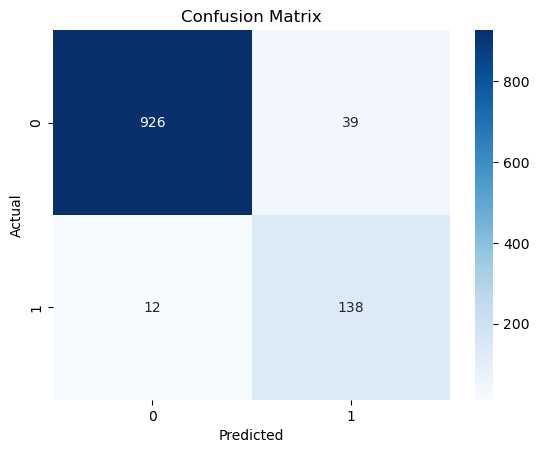

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [131]:
print(classification_report(y_test, y_pred, target_names=["Not Spam", "Spam"]))


              precision    recall  f1-score   support

    Not Spam       0.99      0.96      0.97       965
        Spam       0.78      0.92      0.84       150

    accuracy                           0.95      1115
   macro avg       0.88      0.94      0.91      1115
weighted avg       0.96      0.95      0.96      1115



##  Plot ROC Curve 


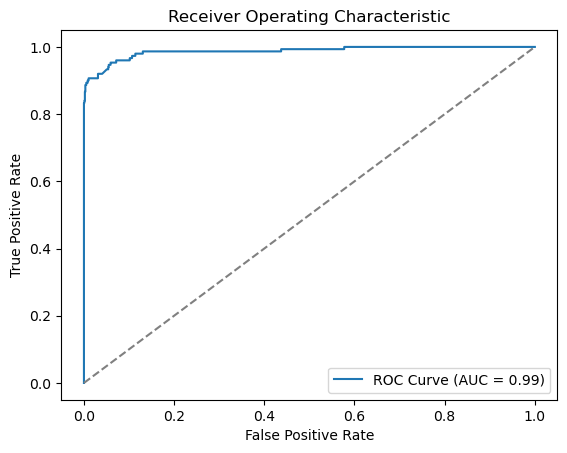

In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
fig, ax = plt.subplots()
ax.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("Receiver Operating Characteristic")
ax.legend()


In [134]:
new_msg = ["Customer service annoncement. You have a New Years delivery waiting for you. Please call 07046744435 now to arrange delivery "]
new_msg_vector = vectorizer.transform(new_msg)
prediction = model.predict(new_msg_vector)
print("Prediction:", prediction)

Prediction: [1]


## Save model

In [135]:
# Save vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

## Load Model 

In [136]:
# Load saved model and vectorizer
import pickle

model = pickle.load(open('model.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))



## Predict message spam or not

In [139]:
# Predict on new message
new_msg = ["England"]
new_msg_vector = vectorizer.transform(new_msg)
prediction = model.predict(new_msg_vector)
print("Prediction:", prediction)

Prediction: [1]


In [140]:
proba = model.predict_proba(new_msg_vector)[0]
confidence = float(proba[prediction]) 

if prediction == 0:
    print(f"Prediction: Ham (Confidence: {confidence*100:.2f}%)")
else:
    print(f"Prediction: Spam (Confidence: {confidence*100:.2f}%)")


Prediction: Spam (Confidence: 81.89%)
